In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(8,5)})

In [31]:
group1 = [
    '50lvl-bn-init.csv',
    '50lvl-neither-bn-init.csv',
    '50lvl-no-bn.csv',
    '50lvl-no-init.csv'
]

group2 = [
    '50lvl.csv',
    '100lvl.csv',
    '500lvl.csv',
    '5000lvl.csv'
]

group3 = [
    '5000lvl.csv',
    '5000lvl-stack.csv',
]

group1 = list(map(lambda x: "train/results/logs/PPO/eval_csv/" + x, group1))
group2 = list(map(lambda x: "train/results/logs/PPO/eval_csv/" + x, group2))
group3 = list(map(lambda x: "train/results/logs/PPO/eval_csv/" + x, group3))

group1, group2, group3

(['train/results/logs/PPO/eval_csv/50lvl-bn-init.csv',
  'train/results/logs/PPO/eval_csv/50lvl-neither-bn-init.csv',
  'train/results/logs/PPO/eval_csv/50lvl-no-bn.csv',
  'train/results/logs/PPO/eval_csv/50lvl-no-init.csv'],
 ['train/results/logs/PPO/eval_csv/50lvl.csv',
  'train/results/logs/PPO/eval_csv/100lvl.csv',
  'train/results/logs/PPO/eval_csv/500lvl.csv',
  'train/results/logs/PPO/eval_csv/5000lvl.csv'],
 ['train/results/logs/PPO/eval_csv/5000lvl.csv',
  'train/results/logs/PPO/eval_csv/5000lvl-stack.csv'])

In [32]:
pd.read_csv(group1[0]).head()

,Wall time,Step,Value
0,1.616157e+09,163840,-1.10
1,1.616158e+09,327680,-1.48
2,1.616158e+09,491520,-0.78
3,1.616159e+09,655360,-0.22
4,1.616160e+09,819200,0.18


In [71]:
def load_group(group):
    dfs = []
    steps = pd.read_csv(group[0])['Step'].tolist()
    for f in group:
        df = pd.read_csv(f)
        df['Runs'] = f.split('/')[-1].split('.')[-2]
        dfs.append(df)
        
    new_df = pd.concat(dfs)
    new_df = new_df.rename({'Value': 'Evaluation Reward'}, axis=1)
    return new_df

<AxesSubplot:xlabel='Step', ylabel='Evaluation Reward'>

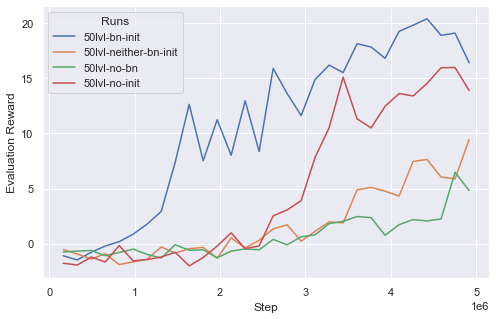

In [72]:
df = load_group(group1)
sns.lineplot(data=df, x='Step', y='Evaluation Reward', hue='Runs')

<AxesSubplot:xlabel='Step', ylabel='Evaluation Reward'>

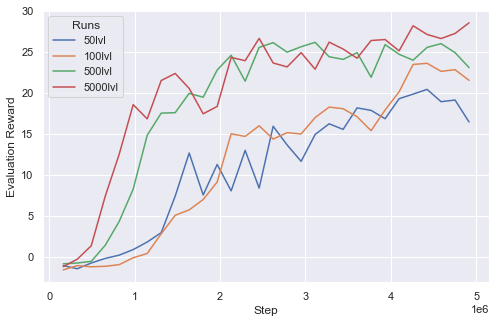

In [73]:
df = load_group(group2)
sns.lineplot(data=df, x='Step', y='Evaluation Reward', hue='Runs')

<AxesSubplot:xlabel='Step', ylabel='Evaluation Reward'>

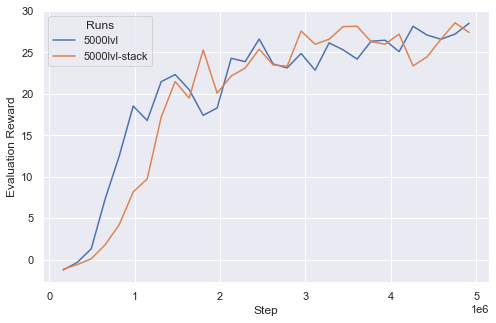

In [74]:
df = load_group(group3)
sns.lineplot(data=df, x='Step', y='Evaluation Reward', hue='Runs')